# D207 Performance Assessment
Author:&nbsp;&nbsp;Coots, Anthony <br />
010958511 <br />
03/25/2024

## Table of Contents:
- [Real-World Organization Situation/Issue](#Real--World-Organization-Situation-Issue)
    - [Question for Analysis](#Question-for-Analysis)
    - [Benefit from Analysis](#Benefit-from-Analysis)
    - [Data Identification](#Data-Identification)
- [Data Analysis](#Data-Analysis)
    - [Code](#Code)
    - [Output](#Output)
    - [Justification](#Justification)
- [Univariate Statistics](#Univariate-Statistics)
    - [Visual of Findings](#Visual-of-Findings-C)
- [Bivariate Statistics](#Bivariate-Statistics)
    - [Visual of Findings](#Visual-of-Findings-D)
- [Summary](#Summary)
    - [Results of Analysis](#Results-of-Analysis)
    - [Limitations of Analysis](#Limitations-of-Analysis)
    - [Recommended Course of Action](#Recommended-Course-of-Action)
- [Supporting Documents](#Supporting-Documents)    
    - [Video](#Video)
    - [Acknowledgement of Web Sources](#Acknowledgement-of-Web-Sources)
    - [Acknowledgement of Sources](#Acknowledgement-of-Sources)

## Real-World Organization Situation/Issue <a name="Real--World-Organization-Situation-Issue"></a>

### A1: Question for Analysis <a name="Question-for-Analysis"></a>

**Question**: "*Does the type of initial admission of a patient correlate to the readmission of a patient as indicated by ReAdmis*?"

Null hypothesis: <br />
- $H_{0}:$ There **is not** a correlation between the type of initial admission and the readmission of patients.
<br /> <br />

Alternative hypothesis: <br />
- $H_{a}:$ There **is** a correlation between the type of initial admission and the readmission of patients.
<br /> <br />

Typically, the null hypothesis is expressed as $H_{0}: \mu_{1} = \mu_{2}$ when dealing with numeric values that represent mean values. However, in this context of analysis which involves categorical variables, the null hypothesis is about the independence of the variables rather than the equality of means.
<br />
&nbsp;

### A2: Benefit from Analysis <a name="Benefit-from-Analysis"></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The analysis aims to determine whether there is a correlation between the type of initial admission and patient readmission variables. Discovering this correlation would be benefit stakeholders in several ways. First, it would enable strategies to reduce readmissions, directly affecting the hospital's quality of care metrics and financial health by minimizing penalties for excessive readmissions as identified in the scenario. Second, it could improve resource allocation where additional patient or follow-up care is necessary. Third, this could drive an investigation into the underlying causes of readmission for certain admission types. A decrease in readmission rates could also enhance patient satisfaction, as fewer readmissions are generally associated with better patient outcomes and experiences. Last, by understanding and acting on these correlations, the hospital could achieve better cost management and higher overall patient satisfaction.

### A3: Data Identification <a name="Data-Identification"></a>

In the cleaned dataset, "medical_clean.csv," the two variables are: <br />
- **Initial_admin**, as defined in the "Medical Data Considerations and Dictionary.pdf" is... "*The means by which the patient was admitted into the hospital initially.*" <br />
- **ReAdmis**, as defined in the "Medical Data Considerations and Dictionary.pdf" is... "*Whether the patient was readmitted within a month of release or not.*" <br /> <br />

If we restructure the question, we get: "Is there a correlation between **Initial_admin** and **ReAdmis** variables?"

## Data Analysis <a name="Data-Analysis"></a>

### B1: Code <a name="Code"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy import stats
import seaborn as sns
import warnings

df = pd.read_csv('medical_clean.csv')

# Contingency table for Initial_admin and ReAdmis categorical variables.
contingency_table = pd.crosstab(df['Initial_admin'], df['ReAdmis'])
observed = contingency_table.values

# Verification
colTotal = len(pd.unique(df['ReAdmis']))
rowTotal = len(pd.unique(df['Initial_admin']))

expectedArr = np.zeros((rowTotal, colTotal))
gto = sum(sum(observed))

for i in range(rowTotal):
    for j in range(colTotal):
        rti = np.sum(observed[i]).tolist()
        ctj = observed.sum(axis = 0)[j].tolist()
        
        expectedArr[i, j] = ((rti * ctj) / gto)
# Verification End

# Set values from the chi-square test. 
chiT, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05

# Calculate the critical value
critical_value = chi2.ppf(1 - alpha, dof)

### B2: Output <a name="Output"></a>

In [2]:
print(contingency_table)

ReAdmis                  No   Yes
Initial_admin                    
Elective Admission     1608   896
Emergency Admission    3156  1904
Observation Admission  1567   869


In [3]:
print("from scipy.stats import chi2_contingency:")
print(expected)

print("\nSelf verification:")
print(expectedArr)

from scipy.stats import chi2_contingency:
[[1585.2824  918.7176]
 [3203.486  1856.514 ]
 [1542.2316  893.7684]]

Self verification:
[[1585.2824  918.7176]
 [3203.486  1856.514 ]
 [1542.2316  893.7684]]


In [7]:
print("P-value:")
if(p_value < 0.05):
    print("\tWe reject the null hypothesis as the p_value (" + str(p_value) + "), is lower than the 0.05 (5%) chance of incorrectly rejecting")
    print("the null hypothesis when the null hypothesis is true.")
else:
    print("\tWe fail to reject the null hypothesis as the p_value, " + str(round(p_value, 3)) + " (" + str(round((p_value * 100), 2)) + "%)" +", is higher than the 0.05 (5%) suggesting")
    print("or lack thereof is likely random. Additionally, the p-value is higher than the common threshold, 5% significance or")
    print("0.05 alpha, and demonstrates that there is not enough statistical evidence to reject the null hypothesis.")

print('\n')

print("Chi-Square Values:")
if(chiT < critical_value):
    print("\tWe fail to reject the null hypothesis as the Chi-Square calculated value, " + str(round(chiT, 3)) + ", is less than the Chi-Square critical")
    print("value, " + str(round(critical_value, 3)) + ". This indicates the variation in the data may be due to random chance as the difference is not")
    print("large enough at our level of significance, " + str(alpha) + ".")
else:
    print("\tWe reject the null hypothesis as the Chi-Square calculated value, " + str(round(chiT, 3)) + ", is greater than the Chi-Square critical")
    print("value, " + str(round(critical_value, 3)) + ". This indicates the variation in the data may not be due to random chance as the difference is")
    print("large enough at our level of significance, " + str(alpha) + ".")

P-value:
	We fail to reject the null hypothesis as the p_value, 0.143 (14.3%), is higher than the 0.05 (5%) suggesting
or lack thereof is likely random. Additionally, the p-value is higher than the common threshold, 5% significance or
0.05 alpha, and demonstrates that there is not enough statistical evidence to reject the null hypothesis.


Chi-Square Values:
	We fail to reject the null hypothesis as the Chi-Square calculated value, 3.89, is less than the Chi-Square critical
value, 5.991. This indicates the variation in the data may be due to random chance as the difference is not
large enough at our level of significance, 0.05.


### B3: Justification <a name="Justification"></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Chi-Square test, alternatively the Chi-Square test of independence was chosen to examine the relationship between the nominal categorical variables "Initial_admin" (the type of initial admission) and "ReAdmis" (readmission status, "Yes" or "No"). This choice is justified as the Chi-Square test is specifically designed for evaluating the correlation or lack thereof between nominal variables, making it ideal for the question in A1 and code in B1. "ReAdmis," the dependent variable, is nominal and directly influenced by "Initial_admin," the independent variable. The method benefits from the large dataset, and in this scenario 10,000 observations, meeting the Chi-Square test's large sample size requirement. By applying this test, we seek to identify patterns in readmission rates linked to initial admission types, making efforts to correct readmission-related correlations and their penalties. This justifies the Chi-Square test's for nominal data to reveal correlation or lack thereof that could assess old or build new strategies for reducing excessive readmissions as described in the scenario.

## Univariate Statistics <a name="Univariate-Statistics"></a>


| Categorical variables | Distribution                                            |
|:----------------------|:--------------------------------------------------------|
| Initial_admin         | Frequency, positive skew away from Emergency Admission. |
| Services              | Frequency, positive skew away from Blood Work.          |

<br />

| Continuous variables  | Distribution                                              |
|:----------------------|:----------------------------------------------------------|
| Income                | Positive skew. With median close to $10,000-20,000 range. |
| Initial_days          | Bimodal. Higher modality near 5 days.                     |

### C1: Visual of Findings <a name="Visual-of-Findings-C"></a>

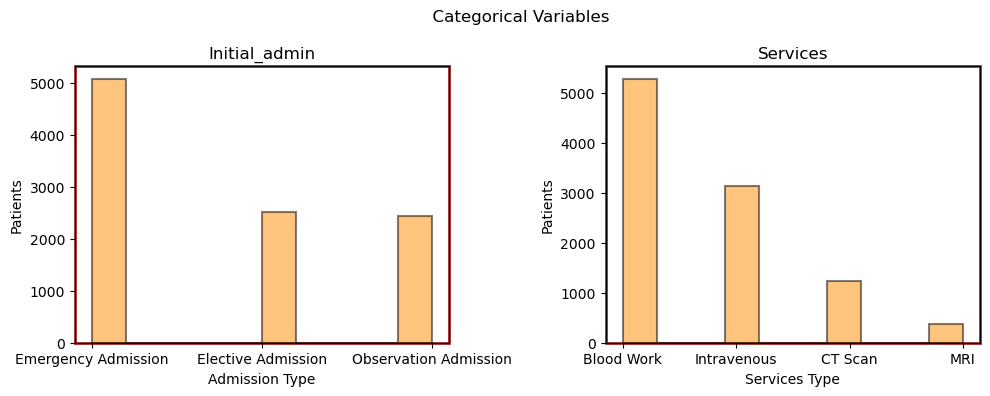

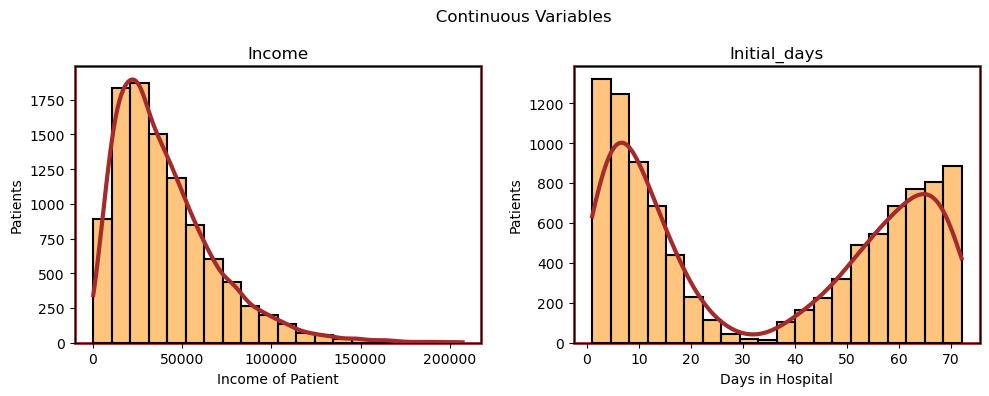

In [8]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# Figure creation for categorical variables plots.
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('          Categorical Variables')

ax[0].hist(df['Initial_admin'], alpha = 0.5, edgecolor = "black", linewidth = 1.5, color = "darkorange")
ax[0].patch.set_edgecolor('brown')  
ax[0].patch.set_linewidth(2)  
ax[0].set_title("Initial_admin")
ax[0].set_xlabel("Admission Type")
ax[0].set_ylabel("Patients")

ax[1].hist(df['Services'], alpha = 0.5, edgecolor = "black", linewidth = 1.5, color = "darkorange")
ax[1].patch.set_edgecolor('brown')  
ax[1].patch.set_linewidth(2)  
ax[1].set_title("Services")
ax[1].set_xlabel("Services Type")
ax[1].set_ylabel("Patients")

fig.tight_layout(w_pad = 2)

# Figure creation for continuous variables plots.
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('           Continuous Variables')

sns.histplot(ax = ax[0], x = df['Income'], alpha = 0.5, bins = 20, kde = True, edgecolor = "black", linewidth = 1.5, color = "darkorange")
ax[0].patch.set_edgecolor('brown')  
ax[0].patch.set_linewidth(2)  
ax[0].lines[0].set_color('brown')
ax[0].lines[0].set_lw(3)
ax[0].set_title("Income")
ax[0].set_xlabel("Income of Patient")
ax[0].set_ylabel("Patients")

sns.histplot(ax = ax[1], x = df['Initial_days'], alpha = 0.5, bins = 20, kde = True, edgecolor = "black", linewidth = 1.5, color = "darkorange")
ax[1].patch.set_edgecolor('brown')  
ax[1].patch.set_linewidth(2)  
ax[1].lines[0].set_color('brown')
ax[1].lines[0].set_lw(3)
ax[1].set_title("Initial_days")
ax[1].set_xlabel("Days in Hospital")
ax[1].set_ylabel("Patients")

fig.tight_layout(w_pad = 2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The four histograms with overlaid density plots reveal the distinct distributions of two categorical variables **'Initial_admin'** and **'Services'** and two continuous variables **'Income'** and **'Initial_days'**. The 'Initial_admin' and 'Services' histograms show the frequency of each category, with 'Initial_admin demonstrating a higher distribution of 'Emergency Admission', similar to a positive skew. The 'Income'  distribution exhibits a more obvious positive skew, indicating that more patients are in the lower income brackets with fewer high-income patients. Additionally, 'Initial_days' presents a bimodal distribution, suggesting two distinct groups of patients categorized by their lengths of hospital stay with favor to < 10 days between the two mode points. These univariate distributions allow for an initial understanding of the data by visualizing the frequency and spread of individual variables.

## Bivariate Statistics <a name="Bivariate-Statistics"></a>

Combinations:
- TotalCharge by ReAdmis
- Additional_charges by HighBlood

Categorical:
- ReAdmis
- HighBlood

Continuous:
- TotalCharge
- Additional_charges

### D1: Visual of Findings <a name="Visual-of-Findings-D"></a>

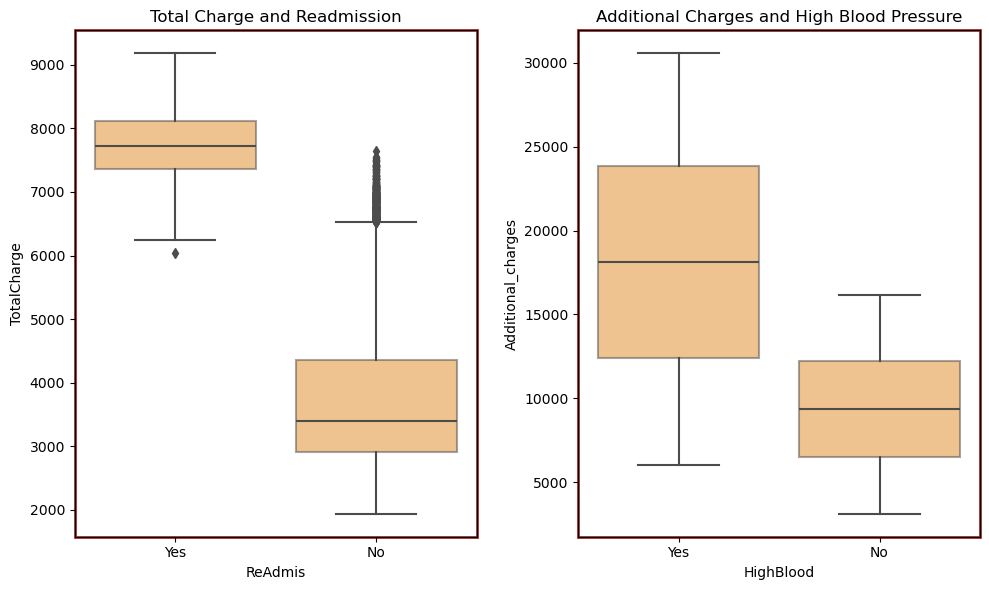

In [9]:
# Figure creation for continuous variables plots.
fig, ax = plt.subplots(1, 2, figsize = (10, 6))

sns.boxplot(ax = ax[0], y = df['TotalCharge'], x = df['ReAdmis'], boxprops = dict(alpha = 0.5), color = "darkorange", order = ["Yes", "No"])
ax[0].patch.set_edgecolor('brown')  
ax[0].patch.set_linewidth(2)  
ax[0].set_title("Total Charge and Readmission")
ax[0].set_xlabel("ReAdmis")
ax[0].set_ylabel("TotalCharge")

sns.boxplot(ax = ax[1], y = df['Additional_charges'], x = df['HighBlood'], boxprops = dict(alpha = 0.5), color = "darkorange")
ax[1].patch.set_edgecolor('brown')  
ax[1].patch.set_linewidth(2)  
ax[1].set_title("Additional Charges and High Blood Pressure")
ax[1].set_xlabel("HighBlood")
ax[1].set_ylabel("Additional_charges")

fig.tight_layout(w_pad = 2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The boxplots (bivariate analysis) compare the distributions for two continuous variables, **'TotalCharge'** and **'AdditionalCharges'** against two categorical variables, **'ReAdmis'** and **'HighBlood'**, respectively. The total charge distribution tied with readmission status, reveals a difference in median charges between patients readmitted and those not readmitted, with readmitted patients accruing higher charges. Similarly, the distribution of additional charges, in or without the presence of high blood pressure, also indicates a differential in the median additional charges, with patients having high blood pressure typically accruing more charges. As seen in the provided boxplots, bivariate statistics suggest potential relationships between the categorical and continuous variables seen above.

## Summary <a name="Summary"></a>

### E1: Results of Analysis <a name="Results-of-Analysis"></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this instance, based on the p-value of 0.143 (14.3%) and Chi-Square statistic (3.89) as a result of the analysis, we fail to reject the null hypothesis, $H_{0}$. This suggests there is **no** correlation between the type of initial admission and the readmission of patients. We compare the p-value, 0.143, to the common alpha level of 0.05 (5%) and the Chi-Square statistic, 3.89, to the critical value 5.991. Since the p-value is greater than 0.05, the data does not provide sufficient enough evidence to support the alternative hypothesis, $H_{a}$, at the 5% significance level or beyond the 5.991 critical value. This means that there is a 14.3% probability that any observed correlation between initial admission type and readmission could be due to random chance, which is above our 5% threshold for statistically significant findings. It should be known that the 5% alpha value is common practice where it suggests that one is willing to accept a 5% chance that correlation found is incorrect to identify. However, we have not found convincing enough evidence to conclude that the type of initial admission affects readmission as a result of our analysis.

### E2: Limitations of Analysis <a name="Limitations-of-Analysis"></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Chi-Square test was useful in the data exploration thus far, by searching into the potential correlation between initial admission type and readmission. However, this test had its limitations. First, it cannot/will not define causation; a lack of correlation does not prove that one factor does not cause the other. Our analysis focused on 'Initial_admin' and 'ReAdmis' variables, based on my high-level assumption that these variables may have revealed a correlation after investigating the dataset. However, patient status details during admission might yield different insights, with the possibility of missing variables that could change the results. Additionally, confounding variables, which could influence both 'Initial_admin' and 'ReAdmis', may have impacted the findings without proper domain knowledge. Finally, the use of typical alpha level of 0.05 (5%) and thus the critical value of 5.991 to determine significance is, by it's nature, arbitrary. While standard, this threshold doesn't necessarily reflect the practical importance of the results.

### E3: Recommended Course of Action <a name="Recommended-Course-of-Action"></a>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In response to the question of whether the type of initial admission correlates with patient readmission as indicated by 'ReAdmis,' the analysis thus far indicates that there is no statistically significant correlation. The Chi-Square test yielded a p-value of 0.143 (14.3%), which is greater than the typical alpha level of 0.05 (5%), where we fail to reject the null hypothesis. This implies that within the dataset, and considering the limitations of the Chi-Square testing, there is not enough evidence to support a correlation between the type of initial admission and a patient being readmitted.
<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I recommend continuing data exploration to find a correlation related to patient readmission. This should involve review of the dataset for accuracy and the inclusion of relevant variables, such as detailed patient status during admission, if available. Should additional correlation search be for not, it may help to expand the dataset. Beyond the Chi-Square test, consider deploying advanced analytical techniques like t-tests and ANOVA, while potentially using more advanced methods that might reveal correlations. Continuously re-assess the research question to align properly with the business needs.

## Supporting Documents <a name="Supporting-Documents"></a>

### F: Video <a name="Video"></a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=457dd804-3974-4c5e-a98c-b140013c7a63

### G: Acknowledgement of Web Sources  <a name="Acknowledgement-of-Web-Sources"></a>

https://jupyterbook.org/en/stable/content/math.html <br />
https://snakify.org/en/lessons/for_loop_range/ <br />
https://www.evanlray.com/stat242_f2019/resources/R/MathinRmd.html <br />
https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/ <br /

### H: Acknowledgement of Sources <a name="Acknowledgement-of-Sources"></a>

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900058/ <br />
https://passel2.unl.edu/view/lesson/9beaa382bf7e/8#:~:text=If%20your%20chi%2Dsquare%20calculated,to%20reject%22%20your%20null%20hypothesis. <br />
https://www.investopedia.com/terms/c/chi-square-statistic.asp <br />
https://www.mun.ca/biology/scarr/4250_Chi-square_critical_values.html <br />

D207 Course Slides/Course Materials